## The scope of this noetbook is to analyze head to heads of several teams of IPL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
# Load the data
df = pd.read_csv(r'data\head_to_head_dataset.csv')

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

Dataset shape: (132, 5)

First few rows:


,Team_A,Team_B,Team_A_Wins,Team_B_Wins,Total_Matches
0,Chennai Super Kings,Delhi Capitals,19,11,30
1,Chennai Super Kings,Gujarat Titans,3,4,7
2,Chennai Super Kings,Kings XI Punjab,16,14,30
3,Chennai Super Kings,Kochi Tuskers Kerala,1,1,2
4,Chennai Super Kings,Kolkata Knight Riders,19,10,29


## Understanding data and Unique teams list

In [3]:
df.shape

(132, 5)

In [4]:
df.isna().sum()

Team_A           0
Team_B           0
Team_A_Wins      0
Team_B_Wins      0
Total_Matches    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team_A         132 non-null    object
 1   Team_B         132 non-null    object
 2   Team_A_Wins    132 non-null    int64 
 3   Team_B_Wins    132 non-null    int64 
 4   Total_Matches  132 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 5.3+ KB


In [10]:
df.nunique()

Team_A           12
Team_B           12
Team_A_Wins      22
Team_B_Wins      22
Total_Matches    19
dtype: int64

In [12]:
df.describe()

,Team_A_Wins,Team_B_Wins,Total_Matches
count,132.000000,132.000000,132.000000
mean,8.257576,8.257576,16.515152
std,7.147968,7.147968,13.605390
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,5.000000
50%,5.000000,5.000000,9.000000
75%,15.000000,15.000000,31.000000
max,26.000000,26.000000,37.000000


In [11]:
teams = sorted(list(set(df['Team_A'].unique()) | set(df['Team_B'].unique())))
print(f"\nTotal number of teams: {len(teams)}")
print(f"Teams: {teams}")


Total number of teams: 12
Teams: ['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


## Win rate calculation for teams as a first step

In [3]:
team_stats = {}

for team in teams:
    # Matches as Team A
    team_a_matches = df[df['Team_A'] == team]
    team_a_wins = team_a_matches['Team_A_Wins'].sum()
    team_a_matches_count = team_a_matches['Total_Matches'].sum()
    
    # Matches as Team B
    team_b_matches = df[df['Team_B'] == team]
    team_b_wins = team_b_matches['Team_B_Wins'].sum()
    team_b_matches_count = team_b_matches['Total_Matches'].sum()
    
    # Total stats
    total_matches = team_a_matches_count + team_b_matches_count
    total_wins = team_a_wins + team_b_wins
    win_rate = (total_wins / total_matches) * 100 if total_matches > 0 else 0
    
    team_stats[team] = {
        'Total_Matches': total_matches // 2,  # Dividing by 2 since each match is counted twice in the dataset
        'Total_Wins': total_wins//2,
        'Win_Rate': win_rate,
    }

In [14]:
team_stats_df = pd.DataFrame(team_stats).T
print("\nTeam Stats:")
team_stats_df = team_stats_df.sort_values(by='Total_Wins', ascending=False)
team_stats_df


Team Stats:


,Total_Matches,Total_Wins,Win_Rate
Mumbai Indians,261.0,144.0,55.172414
Chennai Super Kings,237.0,138.0,58.227848
Kolkata Knight Riders,251.0,131.0,52.191235
Royal Challengers Bangalore,252.0,123.0,48.809524
Sunrisers Hyderabad,257.0,117.0,45.525292
Delhi Capitals,250.0,115.0,46.000000
Kings XI Punjab,246.0,112.0,45.528455
Rajasthan Royals,219.0,112.0,51.141553
Gujarat Titans,75.0,41.0,54.666667
Pune Warriors,75.0,27.0,36.000000



Team Performance Summary:


,Team,Total_Matches,Total_Wins,Win_Rate
0,Chennai Super Kings,237,138,58.23
1,Lucknow Super Giants,43,24,55.81
2,Mumbai Indians,261,144,55.17
3,Gujarat Titans,75,41,54.67
4,Kolkata Knight Riders,251,131,52.19
5,Rajasthan Royals,219,112,51.14
6,Royal Challengers Bangalore,252,123,48.81
7,Delhi Capitals,250,115,46.00
8,Kings XI Punjab,246,112,45.53
9,Sunrisers Hyderabad,257,117,45.53


C:\Users\vampi\AppData\Local\Temp\ipykernel_17160\462783076.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Win_Rate', data=stats_df, palette='viridis')


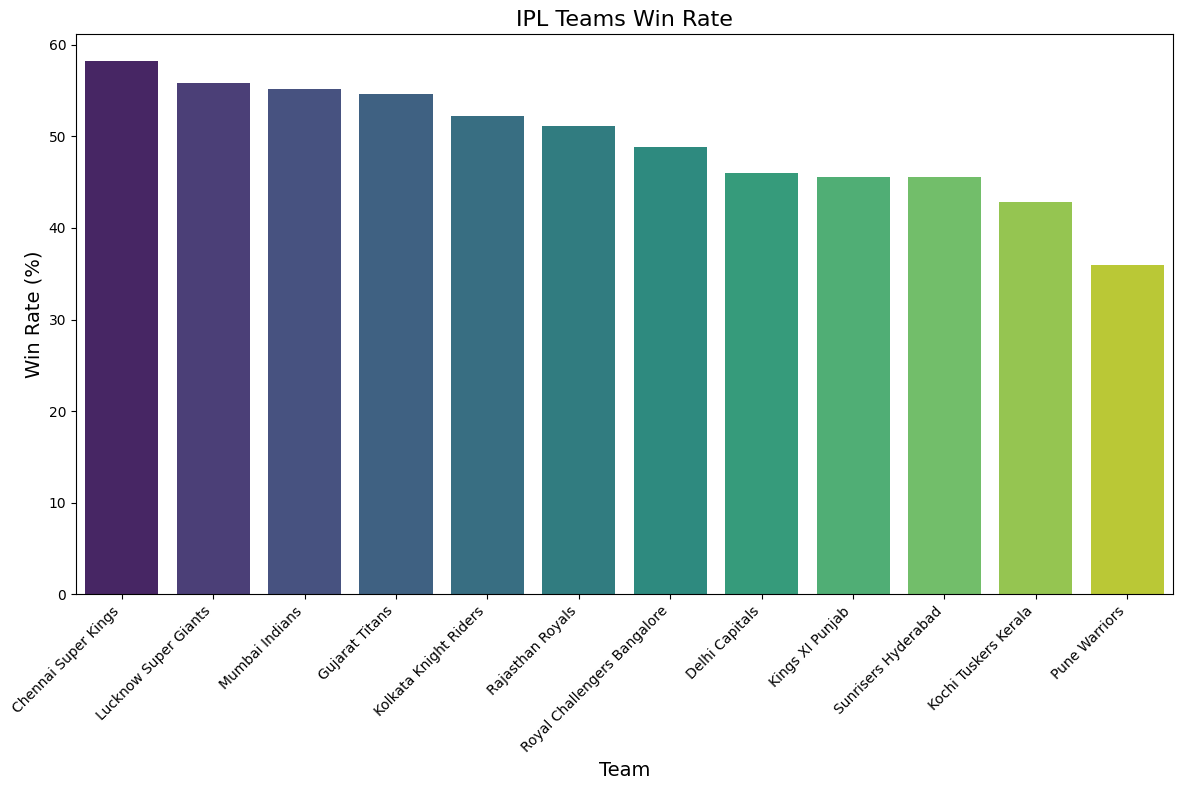

In [ ]:
stats_df = pd.DataFrame.from_dict(team_stats, orient='index').sort_values('Win_Rate', ascending=False)
stats_df = stats_df.reset_index().rename(columns={'index': 'Team'})
stats_df['Win_Rate'] = stats_df['Win_Rate'].round(2)

print("\nTeam Performance Summary:")
display(stats_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Team', y='Win_Rate', data=stats_df, palette='viridis')
plt.title('IPL Teams Win Rate', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Win Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Finding team dominance for each team using win rate

In [ ]:
dominance_scores = {}

for team in teams:
    # Get matchups where team is dominant (win rate > 60%)
    dominant_as_a = df[(df['Team_A'] == team) & ((df['Team_A_Wins'] / df['Total_Matches']) > 0.6)]
    dominant_as_b = df[(df['Team_B'] == team) & ((df['Team_B_Wins'] / df['Total_Matches']) > 0.6)]
    
    # Count how many teams they dominate
    dominated_teams_a = dominant_as_a.shape[0]
    dominated_teams_b = dominant_as_b.shape[0]
    
    dominance_scores[team] = dominated_teams_a + dominated_teams_b

# Convert to DataFrame
dominance_df = pd.DataFrame.from_dict(dominance_scores, orient='index', 
                                       columns=['Teams_Dominated']).sort_values('Teams_Dominated', ascending=False)
dominance_df = dominance_df.reset_index().rename(columns={'index': 'Team'})

print("\nTeam Dominance (Teams with win rate > 60% against):")
display(dominance_df)


Team Dominance (Teams with win rate > 60% against):


,Team,Teams_Dominated
0,Chennai Super Kings,10
1,Gujarat Titans,8
2,Lucknow Super Giants,8
3,Kolkata Knight Riders,6
4,Royal Challengers Bangalore,6
5,Kochi Tuskers Kerala,4
6,Rajasthan Royals,4
7,Sunrisers Hyderabad,4
8,Delhi Capitals,2
9,Kings XI Punjab,2


In [17]:
rivalries = []

for i, row in df.iterrows():
    team_a = row['Team_A']
    team_b = row['Team_B']
    
    if row['Total_Matches'] >= 5:  # Only consider matchups with enough history
        team_a_win_rate = row['Team_A_Wins'] / row['Total_Matches'] * 100
        team_b_win_rate = row['Team_B_Wins'] / row['Total_Matches'] * 100
        
        # How close is this rivalry to 50-50?
        evenness = 100 - abs(team_a_win_rate - team_b_win_rate)
        
        rivalries.append({
            'Team_A': team_a,
            'Team_B': team_b,
            'Total_Matches': row['Total_Matches'],
            'Team_A_Win_Rate': team_a_win_rate,
            'Team_B_Win_Rate': team_b_win_rate,
            'Evenness': evenness
        })

# Convert to DataFrame
rivalry_df = pd.DataFrame(rivalries).sort_values('Evenness', ascending=False)
rivalry_df['Team_A_Win_Rate'] = rivalry_df['Team_A_Win_Rate'].round(1)
rivalry_df['Team_B_Win_Rate'] = rivalry_df['Team_B_Win_Rate'].round(1)
rivalry_df['Evenness'] = rivalry_df['Evenness'].round(1)

print("\nTop 10 Most Competitive Rivalries:")
display(rivalry_df.head(10))

# Create a visualization of the top 5 rivalries
top_rivalries = rivalry_df.head(5)



Top 10 Most Competitive Rivalries:


,Team_A,Team_B,Total_Matches,Team_A_Win_Rate,Team_B_Win_Rate,Evenness
75,Rajasthan Royals,Kolkata Knight Riders,28,50.0,50.0,100.0
65,Pune Warriors,Kings XI Punjab,10,50.0,50.0,100.0
44,Kolkata Knight Riders,Rajasthan Royals,28,50.0,50.0,100.0
33,Kings XI Punjab,Pune Warriors,10,50.0,50.0,100.0
18,Delhi Capitals,Sunrisers Hyderabad,35,51.4,48.6,97.1
92,Sunrisers Hyderabad,Delhi Capitals,35,48.6,51.4,97.1
29,Kings XI Punjab,Delhi Capitals,33,51.5,48.5,97.0
35,Kings XI Punjab,Royal Challengers Bangalore,33,51.5,48.5,97.0
11,Delhi Capitals,Kings XI Punjab,33,48.5,51.5,97.0
84,Royal Challengers Bangalore,Kings XI Punjab,33,48.5,51.5,97.0


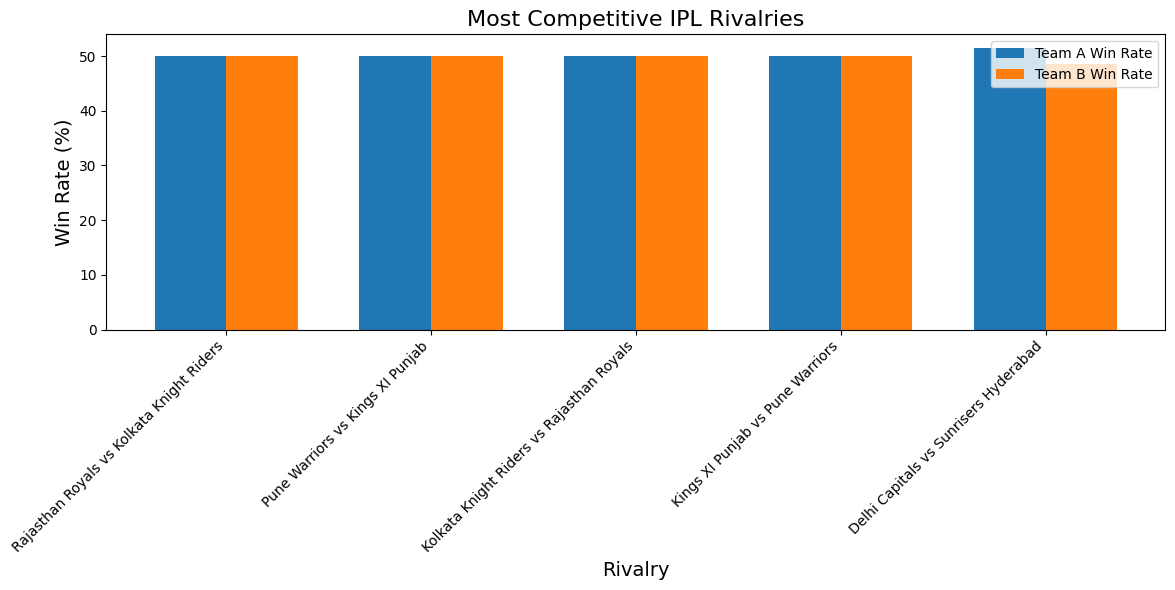

In [18]:
plt.figure(figsize=(12, 6))
x = np.arange(len(top_rivalries))
width = 0.35

plt.bar(x - width/2, top_rivalries['Team_A_Win_Rate'], width, label='Team A Win Rate')
plt.bar(x + width/2, top_rivalries['Team_B_Win_Rate'], width, label='Team B Win Rate')

plt.xlabel('Rivalry', fontsize=14)
plt.ylabel('Win Rate (%)', fontsize=14)
plt.title('Most Competitive IPL Rivalries', fontsize=16)
plt.xticks(x, [f"{a} vs {b}" for a, b in zip(top_rivalries['Team_A'], top_rivalries['Team_B'])], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Creating a power level fields which takes win rates and number of matches into consideration


Top 10 Most One-sided Matchups:


,Team_A,Team_B,Total_Matches,Team_A_Win_Rate,Team_B_Win_Rate,Evenness
50,Lucknow Super Giants,Mumbai Indians,6,83.3,16.7,33.3
73,Rajasthan Royals,Gujarat Titans,6,16.7,83.3,33.3
58,Mumbai Indians,Lucknow Super Giants,6,16.7,83.3,33.3
25,Gujarat Titans,Rajasthan Royals,6,83.3,16.7,33.3
76,Rajasthan Royals,Lucknow Super Giants,5,80.0,20.0,40.0
23,Gujarat Titans,Lucknow Super Giants,5,80.0,20.0,40.0
48,Lucknow Super Giants,Gujarat Titans,5,20.0,80.0,40.0
78,Rajasthan Royals,Pune Warriors,5,80.0,20.0,40.0
68,Pune Warriors,Rajasthan Royals,5,20.0,80.0,40.0
51,Lucknow Super Giants,Rajasthan Royals,5,20.0,80.0,40.0



Team Power Ranking (weighted by matches played):


,Team,Win_Rate,Total_Matches,Power_Ranking
0,Chennai Super Kings,58.23,237,56.623655
2,Mumbai Indians,55.17,261,55.170000
4,Kolkata Knight Riders,52.19,251,51.590115
5,Rajasthan Royals,51.14,219,48.671172
6,Royal Challengers Bangalore,48.81,252,48.305069
7,Delhi Capitals,46.00,250,45.418391
9,Sunrisers Hyderabad,45.53,257,45.320667
8,Kings XI Punjab,45.53,246,44.745000
3,Gujarat Titans,54.67,75,42.981931
1,Lucknow Super Giants,55.81,43,41.825425


C:\Users\vampi\AppData\Local\Temp\ipykernel_17160\3798213885.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Power_Ranking', data=stats_df, palette='plasma')


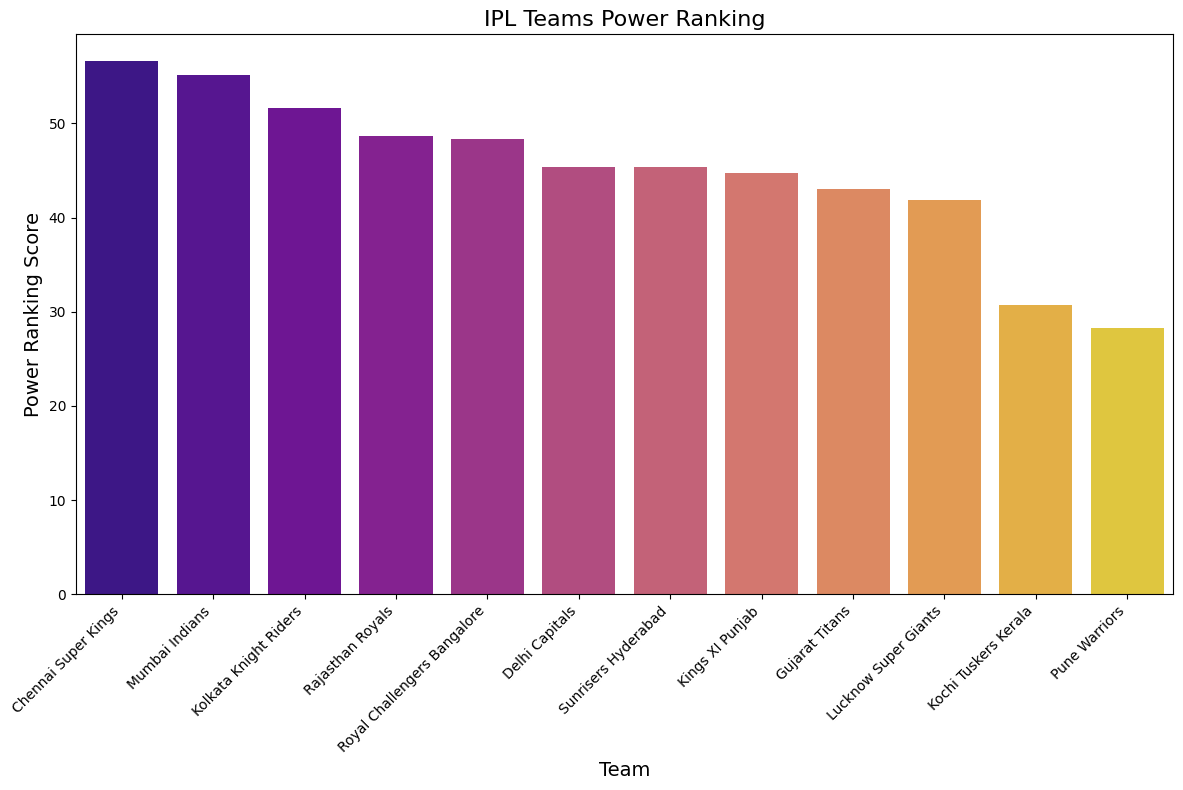

In [ ]:
# Find most one-sided matchups (for teams that have played at least 5 matches)
one_sided_df = rivalry_df[rivalry_df['Total_Matches'] >= 5].sort_values('Evenness').head(10)
print("\nTop 10 Most One-sided Matchups:")
display(one_sided_df)

# Additional analysis: Create a simple "power ranking" that considers win rate and total matches
stats_df['Matches_Weight'] = stats_df['Total_Matches'] / stats_df['Total_Matches'].max()
stats_df['Power_Ranking'] = stats_df['Win_Rate'] * (0.7 + 0.3 * stats_df['Matches_Weight'])
stats_df = stats_df.sort_values('Power_Ranking', ascending=False)

print("\nTeam Power Ranking (weighted by matches played):")
display(stats_df[['Team', 'Win_Rate', 'Total_Matches', 'Power_Ranking']])

# Visualize power ranking
plt.figure(figsize=(12, 8))
sns.barplot(x='Team', y='Power_Ranking', data=stats_df, palette='plasma')
plt.title('IPL Teams Power Ranking', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Power Ranking Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()  